Tujuan clustering ini adalah untuk mengelompokkan komoditas pangan berdasarkan karakteristik ketersediaan, kebutuhan, dan tingkat surplus/defisit selama periode 2019–2023, sehingga dapat diidentifikasi komoditas yang tergolong aman, seimbang, maupun rawan pangan.

In [ ]:
# import pustaka yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
# load data
df = pd.read_csv('D:/My/Data Analyst/Pangan_jateng_analysis/data/processed/pangan_jateng_2019_2023.csv')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun_data        476 non-null    int64 
 1   komoditas_pangan  476 non-null    object
 2   bulan_data        476 non-null    object
 3   ketersdiaan_data  476 non-null    int64 
 4   kebutuhan_data    476 non-null    int64 
 5   deviasi_data      476 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 22.4+ KB


,tahun_data,komoditas_pangan,bulan_data,ketersdiaan_data,kebutuhan_data,deviasi_data
0,2019,Padi,Desember,5736886,3197547,2539339
1,2019,Jagung,Desember,3467314,31246,3436068
2,2019,Kedelai,Desember,64334,340238,-275904
3,2019,K. Tanah,Desember,74605,3472,71133
4,2019,K. Hijau,Desember,99989,17359,82630


In [ ]:
# rename kolom untuk memudahkan analisis
df = df.rename(columns={
    'tahun_data': 'tahun',
    'bulan_data': 'bulan',
    'komoditas_pangan': 'komoditas',
    'ketersdiaan_data': 'ketersediaan',
    'kebutuhan_data': 'kebutuhan',
    'deviasi_data': 'deviasi'
})


In [ ]:
# membersihkan data pada kolom komoditas
df['komoditas'] = (
    df['komoditas']
    .astype(str)
    .str.strip()
    .str.lower()
)

df['komoditas'].value_counts()



komoditas
bawang merah            38
kedelai                 38
telur                   38
jagung                  38
beras                   36
minyak goreng           36
daging ayam             36
bawang putih            36
cabai rawit             26
gula konsumsi           24
daging sapi             24
cabai besar             24
daging sapi / kerbau    12
daging total            12
cabe rawit              12
cabe besar              12
gula pasir              12
garam                    2
cabai merah              2
ikan                     2
susu                     2
daging                   2
gula                     2
ubi jalar                2
ubi kayu                 2
k. hijau                 2
k. tanah                 2
padi                     2
Name: count, dtype: int64

In [ ]:
# menambahkan kolom surplus_defisit dan rasio_pangan
df['surplus_defisit'] = df['ketersediaan'] - df['kebutuhan']
df['rasio_pangan'] = df['ketersediaan'] / df['kebutuhan']


In [ ]:
# membuat dataframe untuk clustering
cluster_df = df.groupby('komoditas').agg({
    'ketersediaan': 'mean',
    'kebutuhan': 'mean',
    'surplus_defisit': 'mean',
    'rasio_pangan': 'mean'
}).reset_index()

cluster_df

,komoditas,ketersediaan,kebutuhan,surplus_defisit,rasio_pangan
0,bawang merah,5.061747e+04,1.659595e+04,3.402153e+04,3.495142
1,bawang putih,-1.051514e+04,8.254000e+03,-1.876914e+04,-1.079182
2,beras,1.051310e+06,3.426591e+05,7.086506e+05,3.092889
3,cabai besar,2.099429e+04,9.542417e+03,1.145188e+04,2.222793
4,cabai merah,2.336090e+05,6.321000e+04,1.703990e+05,3.670107
5,cabai rawit,4.023473e+04,1.696515e+04,2.326958e+04,1.656475
6,cabe besar,1.937675e+04,1.149850e+04,7.878250e+03,1.684140
7,cabe rawit,2.078817e+04,1.359575e+04,7.192417e+03,1.527446
8,daging,3.916435e+05,3.240775e+05,6.756600e+04,1.246338
9,daging ayam,1.196405e+05,3.129700e+04,8.834353e+04,5.115594


In [ ]:
# memilih fitur untuk clustering
X = cluster_df[['ketersediaan', 'kebutuhan', 'surplus_defisit', 'rasio_pangan']]


In [ ]:
# standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


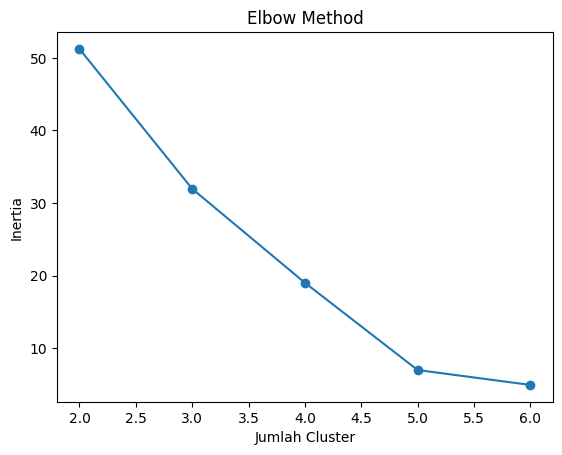

In [ ]:
# menentukan jumlah cluster menggunakan metode elbow
inertia = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 7), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# menerapkan KMeans dengan jumlah cluster yang dipilih
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_df['cluster'] = kmeans.fit_predict(X_scaled)

In [16]:
cluster_df

,komoditas,ketersediaan,kebutuhan,surplus_defisit,rasio_pangan,cluster
0,bawang merah,5.061747e+04,1.659595e+04,3.402153e+04,3.495142,2
1,bawang putih,-1.051514e+04,8.254000e+03,-1.876914e+04,-1.079182,2
2,beras,1.051310e+06,3.426591e+05,7.086506e+05,3.092889,2
3,cabai besar,2.099429e+04,9.542417e+03,1.145188e+04,2.222793,2
4,cabai merah,2.336090e+05,6.321000e+04,1.703990e+05,3.670107,2
5,cabai rawit,4.023473e+04,1.696515e+04,2.326958e+04,1.656475,2
6,cabe besar,1.937675e+04,1.149850e+04,7.878250e+03,1.684140,2
7,cabe rawit,2.078817e+04,1.359575e+04,7.192417e+03,1.527446,2
8,daging,3.916435e+05,3.240775e+05,6.756600e+04,1.246338,2
9,daging ayam,1.196405e+05,3.129700e+04,8.834353e+04,5.115594,2


In [ ]:
# membuat ringkasan cluster 
cluster_summary = cluster_df.groupby('cluster')[[
    'ketersediaan',
    'kebutuhan',
    'surplus_defisit',
    'rasio_pangan'
]].mean()

cluster_summary


,ketersediaan,kebutuhan,surplus_defisit,rasio_pangan
cluster,,,,
0,4.324369e+05,1.025014e+05,3.299356e+05,12.157018
1,5.674414e+06,3.144872e+06,2.529543e+06,1.804513
2,1.662223e+05,8.426433e+04,8.195798e+04,2.339225
3,2.834500e+06,3.290635e+05,2.505436e+06,8.621987
4,1.735939e+04,5.795837e+04,-4.059897e+04,-17.622852


In [ ]:
# menghitung jumlah komoditas pada setiap cluster
cluster_count = cluster_df.groupby('cluster')['komoditas'].count()
cluster_count


cluster
0     4
1     1
2    21
3     1
4     1
Name: komoditas, dtype: int64

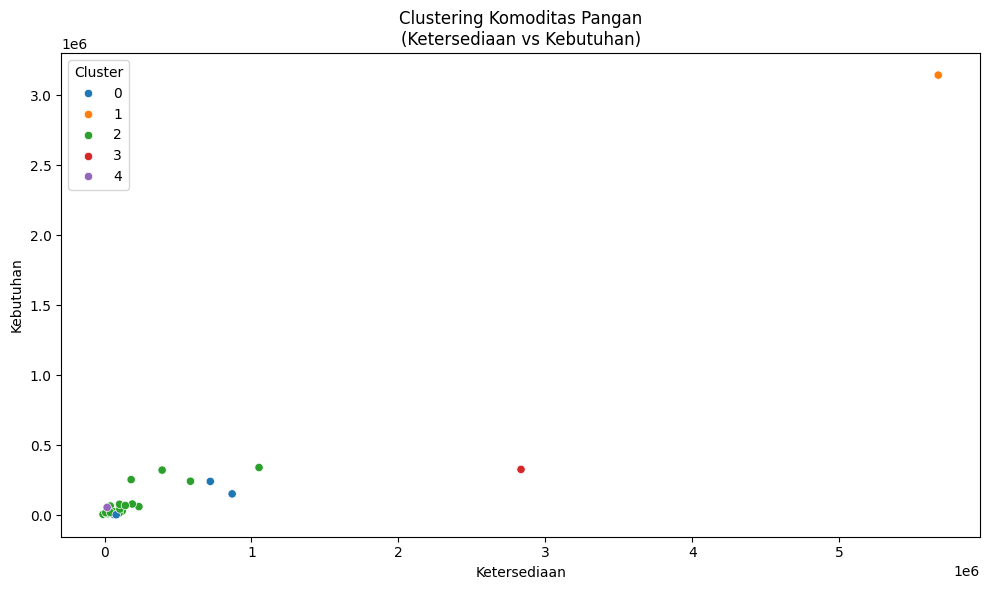

In [ ]:
# visualisasi hasil clustering
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=cluster_df,
    x='ketersediaan',
    y='kebutuhan',
    hue='cluster',
    palette='tab10'
)

plt.title('Clustering Komoditas Pangan\n(Ketersediaan vs Kebutuhan)')
plt.xlabel('Ketersediaan')
plt.ylabel('Kebutuhan')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


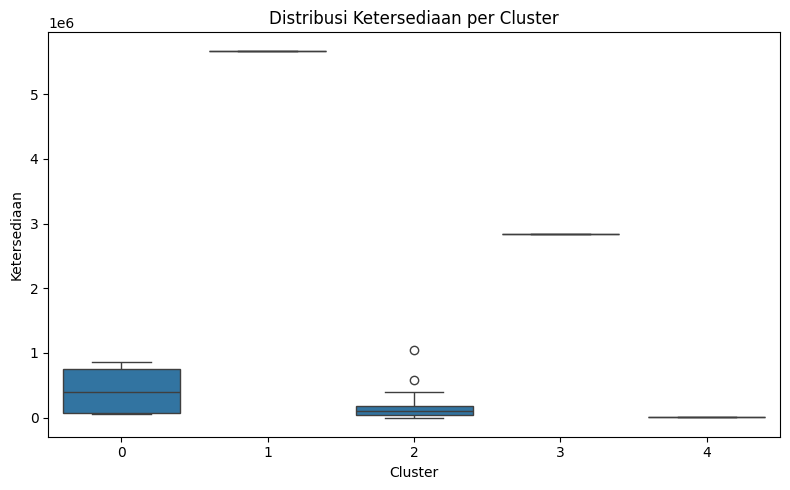

In [ ]:
# visualisasi distribusi ketersediaan per cluster
plt.figure(figsize=(8,5))
sns.boxplot(
    data=cluster_df,
    x='cluster',
    y='ketersediaan'
)

plt.title('Distribusi Ketersediaan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ketersediaan')
plt.tight_layout()
plt.show()


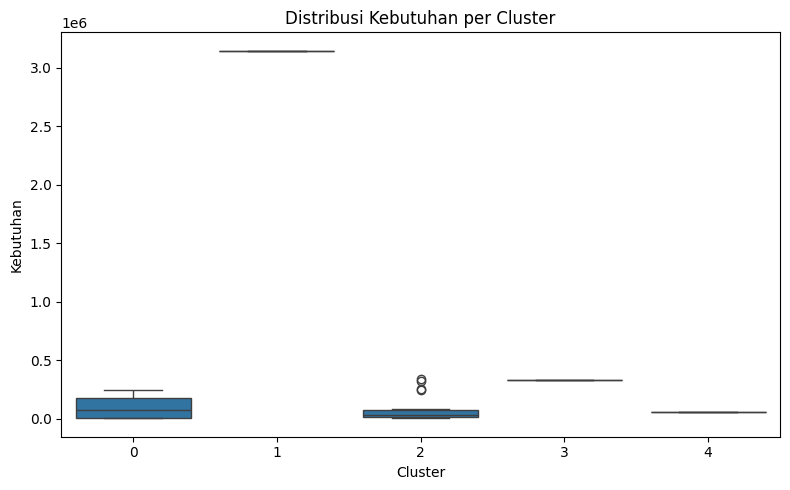

In [ ]:
# visualisasi distribusi kebutuhan per cluster
plt.figure(figsize=(8,5))
sns.boxplot(
    data=cluster_df,
    x='cluster',
    y='kebutuhan'
)

plt.title('Distribusi Kebutuhan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Kebutuhan')
plt.tight_layout()
plt.show()


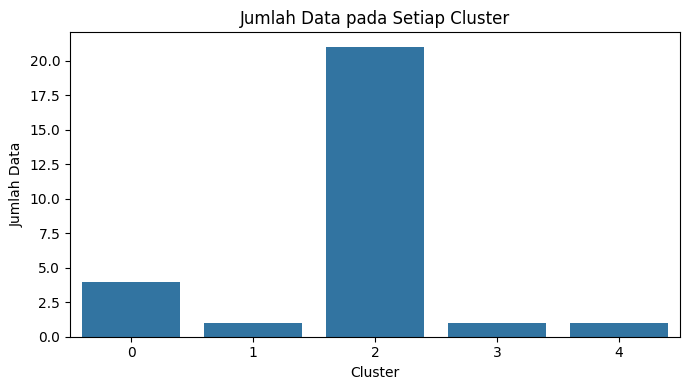

In [ ]:
# visualisasi jumlah data pada setiap cluster
cluster_count = cluster_df['cluster'].value_counts().sort_index()

plt.figure(figsize=(7,4))
sns.barplot(
    x=cluster_count.index,
    y=cluster_count.values
)

plt.title('Jumlah Data pada Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.tight_layout()
plt.show()


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tahun            476 non-null    int64  
 1   komoditas        476 non-null    object 
 2   bulan            476 non-null    object 
 3   ketersediaan     476 non-null    int64  
 4   kebutuhan        476 non-null    int64  
 5   deviasi          476 non-null    int64  
 6   surplus_defisit  476 non-null    int64  
 7   rasio_pangan     476 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 29.9+ KB


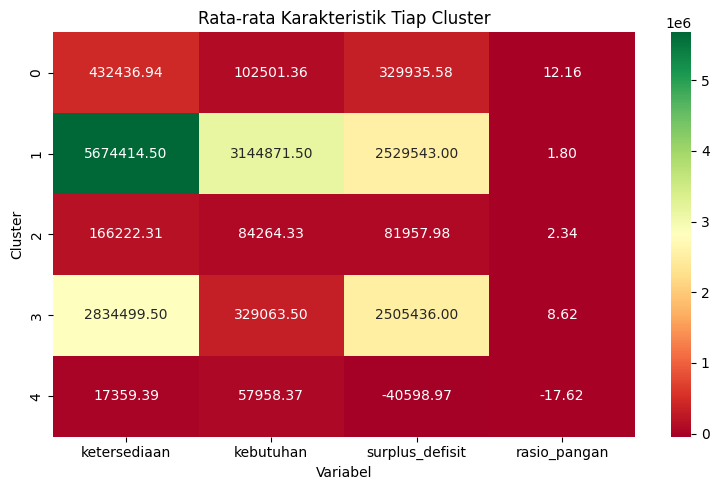

In [ ]:
# visualisasi rata-rata karakteristik tiap cluster
cluster_mean = cluster_df.groupby('cluster')[[
    'ketersediaan',
    'kebutuhan',
    'surplus_defisit',
    'rasio_pangan'
]].mean()

plt.figure(figsize=(8,5))
sns.heatmap(
    cluster_mean,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

plt.title('Rata-rata Karakteristik Tiap Cluster')
plt.ylabel('Cluster')
plt.xlabel('Variabel')
plt.tight_layout()
plt.show()
